# Named System Colors

The following named colors are available:

* "pen" - access to the main drawing color of the current theme flavor
* "paper" - access to the plot background of the current theme flavor
* "brush" - default blue color

In [1]:
import pandas as pd

from lets_plot import *
from lets_plot.bistro import *


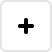
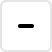
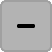
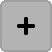
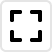
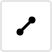
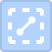
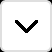
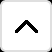
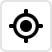

In [2]:
LetsPlot.setup_html()

In [3]:
mpg_df = pd.read_csv("https://raw.githubusercontent.com/JetBrains/lets-plot-docs/master/data/mpg.csv")
mpg_df.head()

,Unnamed: 0,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [4]:
ggplot(mpg_df, aes(x='cty', y='hwy')) + geom_point() + geom_smooth()

#### 1. Use Named System Colors

In [5]:
ggplot(mpg_df, aes(x='cty', y='hwy')) + \
    geom_point(shape=21, fill='paper', color='brush') + \
    geom_smooth(color='pen', fill='brush')

#### 2. With Theme Flavor

In [6]:
gggrid([
    ggplot(mpg_df, aes(x='cty', y='hwy')) + 
        geom_point(shape=21) + 
        geom_smooth() + 
        flavor_darcula() + 
        ggtitle("Default"),

    ggplot(mpg_df, aes(x='cty', y='hwy')) + 
        geom_point(shape=21, fill='paper', color='pen') +
        geom_smooth(color='paper', fill='brush', alpha=.5) +
        flavor_darcula() +
        ggtitle("Use system colors")
])

A custom background color does not affect the system color:

In [7]:
ggplot(mpg_df, aes(x='cty', y='hwy')) + \
    geom_point(shape=21, fill='paper', color='pen') + \
    geom_smooth(color='paper', fill='brush', alpha=.5) + \
    flavor_darcula() + \
    theme(plot_background=element_rect(fill='light_green'))

#### 3. Use for Marginal Layers

In [8]:
def withFlavor(flavor):
    return gggrid([
        joint_plot(mpg_df, "cty", "hwy", marginal="hist:tr") + flavor + ggtitle("default"),
        joint_plot(mpg_df, "cty", "hwy", marginal="hist:tr", color='pen') + flavor + ggtitle("color='pen'")
      ], ncol=2)

##### 3.1 Light theme

In [9]:
withFlavor(flavor_solarized_light())

##### 3.2 Dark theme

In [10]:
withFlavor(flavor_solarized_dark())